# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [20]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot
import pandas as pd
import numpy as np

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


In [47]:
class Subclass(Suite):
    
    y = 0.9
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 'H' or 'T'
        hypo: percentage of heads(0-100)
        """
        y = self.y
        x = hypo/100
        if data == 'H':
            like = x *y + (1-x)*(1-y)
        elif data == 'T':
            like = (1-x) *y + x *(1-y)
        return like

# The Lying Euro Problem 

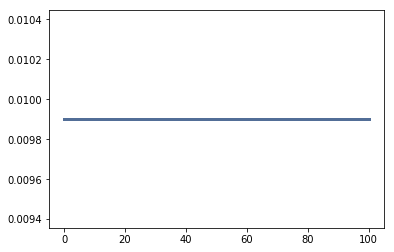

In [48]:
prior = Subclass(range(101))
thinkplot.Pdf(prior)

70

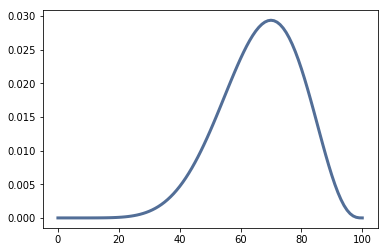

In [50]:
coin = Subclass(range(101))
coin.y = 1

for outcome in 'HHHHHHHTTT':
    coin.Update(outcome)

thinkplot.Pdf(coin)
coin.MaximumLikelihood()

70

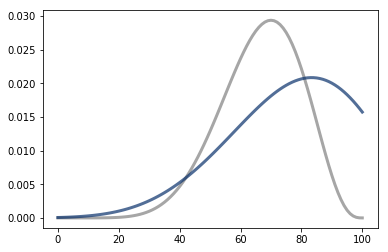

In [57]:
thinkplot.Pdf(coin, color = 'gray')

coin2 = Subclass(range(101))
coin2.y = 0.8

for outcome in 'HHHHHHHTTT':
    coin2.Update(outcome)

thinkplot.Pdf(coin2)
coin.MaximumLikelihood()

# The Pitcher Problem

In [24]:
#Create a table for the computations
class BayesTable(pd.DataFrame):
    def __init__(self, hypo, prior=1):
        #create the table with the initial sections
        columns = ['hypo', 'prior', 'likelihood', 'unnorm', 'posterior']
        super().__init__(columns=columns)
        self.hypo = hypo
        self.prior = prior
    
    def mult(self):
        #set a function to multiply the prior by the likelihood
        self.unnorm = self.prior * self.likelihood
        
    def norm(self):
        #set a function to normalize the values
        nc = np.sum(self.unnorm)
        self.posterior = self.unnorm / nc
        return nc
    
    def update(self):
        #set a function that will do both mult and norm in one step
        self.mult()
        return self.norm()
    
    def reset(self):
        return BayesTable(self.hypo, self.posterior)

In [27]:
baseball = BayesTable(['Player', 'Pitcher'], [8/9,1/9])
baseball

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.888889,NaN,NaN,NaN
1,Pitcher,0.111111,NaN,NaN,NaN


In [34]:
no_hit = baseball
no_hit.likelihood = [0.405, 0.681]
no_hit.update()
no_hit

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.888889,0.405,0.360000,0.82632
1,Pitcher,0.111111,0.681,0.075667,0.17368


In [36]:
one_hit = baseball.reset()
one_hit.likelihood = [(0.26*0.74*0.74),(0.12*0.88*0.88)]
one_hit.update()
one_hit

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.82632,0.142376,0.117648,0.879363
1,Pitcher,0.17368,0.092928,0.016140,0.120637


In [58]:
two_hit = baseball.reset()
two_hit.likelihood = [0.26*0.26*0.74, 0.12*0.12*0.88]
two_hit.update()
two_hit

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.82632,0.050024,0.041336,0.949448
1,Pitcher,0.17368,0.012672,0.002201,0.050552


In [60]:
three_hit = baseball.reset()
three_hit.likelihood = [0.26**3, 0.12**3]
three_hit.update()
three_hit

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.82632,0.017576,0.014523,0.979754
1,Pitcher,0.17368,0.001728,0.000300,0.020246


This question is based on the simplification that all non-pitchers hit .260 and all pitchers hit .120, but in reality there is some spread in both categories.  Does that make our answer to the first question too high or too low?

Could either run with the mean or could run the analysis and then compute the mean. If the analysis is linear than it would be the same but since its cubed it will matter and will not remain the same. If run with two groups of each and changing the values to be 0.1 in either direction and add the posteriors: the answers give the same value (at least to the fourth decimal place) - a tiny bit less 

the standard deviation being greater could make a bigger difference


In [61]:
no_hit_whole_season = baseball.reset()
no_hit_whole_season.likelihood = [0.74**162, 0.88**162]
no_hit_whole_season.update()
no_hit_whole_season

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.82632,6.539410e-22,5.403644e-22,3.067211e-12
1,Pitcher,0.17368,1.014362e-09,1.761745e-10,1.000000e+00


In [63]:
half_whole_season = baseball.reset()
half_whole_season.likelihood = [0.74**81*0.26**81, 0.88**81*0.12**81]
half_whole_season.update()
half_whole_season

,hypo,prior,likelihood,unnorm,posterior
0,Player,0.82632,1.048602e-58,8.664802e-59,1.000000e+00
1,Pitcher,0.17368,8.256146e-80,1.433929e-80,1.654889e-22


# The Height Problem